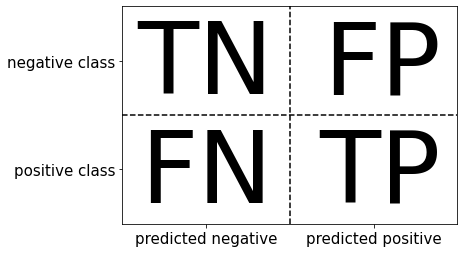

In [2]:
import mglearn
mglearn.plots.plot_binary_confusion_matrix()

In [3]:
!pip install torch cuda

In [4]:
import torch
import numpy as np

In [6]:
torch.version

<module 'torch.version' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\torch\\version.py'>

In [6]:
data = [[1, 2], [3, 4]]

In [7]:
np_data = np.array(data)

In [8]:
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [9]:
x_data_f = torch.FloatTensor(data)
x_data_f

tensor([[1., 2.],
        [3., 4.]])

In [10]:
print (x_data_f.shape)

torch.Size([2, 2])


In [11]:
print (x_data_f.dim())

2


In [12]:
print (x_data_f.size())

torch.Size([2, 2])


In [13]:
x_data_f[0]

tensor([1., 2.])

In [14]:
x_data_f[0][1]

tensor(2.)

In [15]:
x_data_f[0][:]

tensor([1., 2.])

In [16]:
t1 = torch.FloatTensor([1,3])
t2 = torch.FloatTensor([2,4])
print(t1+t2)

tensor([3., 7.])


In [17]:
t1 = torch.FloatTensor([1,3])
t2 = torch.FloatTensor([2])
print(t1+t2)

tensor([3., 5.])


In [18]:
x_data_f.mean() #1,2,3,4

tensor(2.5000)

In [19]:
x_data_f.mean(dim=0)
#1 2
#3 4 평균

tensor([2., 3.])

In [20]:
x_data_f.mean(dim=1)
#1 2
#3 4 평균

tensor([1.5000, 3.5000])

In [21]:
t1 = torch.FloatTensor([1,3])
t2 = torch.FloatTensor([2,4])

In [22]:
torch.cat([t1, t2], dim=0)

tensor([1., 3., 2., 4.])

In [23]:
t3 = torch.FloatTensor([5,6])
t4 = torch.stack([t1,t2,t3]) #리스트 형태로 쌓고싶은것을 리스트로 담아주면 합쳐준다
t4 

tensor([[1., 3.],
        [2., 4.],
        [5., 6.]])

In [24]:
torch.ones_like(t4)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [25]:
torch.zeros_like(t4)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])

In [26]:
X_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

In [ ]:
# 가설 설정
# y = W*x + b
# 기존 머신러닝 : MSE 평균제곱오차
# 딥러닝 세상의 인식 체계
# cost function(비용함수)=loss function(손실함수)=error function(오차함수)=objective function(목적함수)
# 옵티마이저는 경사하강법(Gradient Desent)을 사용(ex. 머신러닝에서 fit)

In [28]:
print(X_train)
print(X_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


In [29]:
print(y_train)
print(y_train.shape)

tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


In [31]:
W = torch.zeros(1, requires_grad=True) #W는 gradient 변수를 써 변화될 변수다
print(W)

tensor([0.], requires_grad=True)


In [32]:
b = torch.zeros(1, requires_grad=True)
print(b)

tensor([0.], requires_grad=True)


In [ ]:
# y = 0*x+0

In [34]:
hypothesis = X_train*W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


In [35]:
cost = torch.mean((hypothesis-y_train)**2)  # 평균제곱오차
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


In [36]:
import torch.optim as optim
optimizer = optim.SGD([W, b], lr=0.01)

In [51]:
optimizer.zero_grad()
cost.backward()  # 역추적
optimizer.step()

RuntimeError: Trying to backward through the graph a second time (or directly access saved variables after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved variables after calling backward.

In [53]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

X_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=0.001)

nb_epochs = 20000   # 어떠한 시대를 의미
list_cost = []
for epoch in range(nb_epochs):
    hypothesis = X_train*W + b
    cost = torch.mean((hypothesis-y_train)**2) # 현재상태에서 가격이 얼마인지
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 200 == 0:
        print('Epoch{:4d}/{} W:{:.3f}, b:{:.3f} cost:{:.5f}'.format(epoch, nb_epochs, W.item(),b.item(),cost.item()))
        
print(len(list_cost))
#plt.plot(range(100), list_cost, marker='x')
#plt.show()

Epoch   0/20000 W:0.019, b:0.008 cost:18.66667
Epoch 200/20000 W:1.513, b:0.624 cost:0.28531
Epoch 400/20000 W:1.686, b:0.661 cost:0.06679
Epoch 600/20000 W:1.717, b:0.637 cost:0.05845
Epoch 800/20000 W:1.732, b:0.608 cost:0.05306
Epoch1000/20000 W:1.745, b:0.579 cost:0.04820
Epoch1200/20000 W:1.757, b:0.552 cost:0.04378
Epoch1400/20000 W:1.768, b:0.526 cost:0.03976
Epoch1600/20000 W:1.779, b:0.502 cost:0.03612
Epoch1800/20000 W:1.790, b:0.478 cost:0.03281
Epoch2000/20000 W:1.800, b:0.456 cost:0.02980
Epoch2200/20000 W:1.809, b:0.434 cost:0.02707
Epoch2400/20000 W:1.818, b:0.414 cost:0.02458
Epoch2600/20000 W:1.826, b:0.394 cost:0.02233
Epoch2800/20000 W:1.835, b:0.376 cost:0.02028
Epoch3000/20000 W:1.842, b:0.358 cost:0.01842
Epoch3200/20000 W:1.850, b:0.341 cost:0.01673
Epoch3400/20000 W:1.857, b:0.325 cost:0.01520
Epoch3600/20000 W:1.864, b:0.310 cost:0.01381
Epoch3800/20000 W:1.870, b:0.296 cost:0.01254
Epoch4000/20000 W:1.876, b:0.282 cost:0.01139
Epoch4200/20000 W:1.882, b:0.268 

In [ ]:
# 가설 설정 : x가 3개인 다변량 회귀
# y = W1*x1 + W2*x2 +W3*x3 +b

In [60]:
X1_train = torch.FloatTensor([[73],[93],[89],[96],[73]])
X2_train = torch.FloatTensor([[80],[88],[91],[98],[66]])
X3_train = torch.FloatTensor([[75],[93],[90],[100],[70]])

y_train = torch.FloatTensor([[152],[185],[180],[196],[142]])

W1 = torch.zeros(1, requires_grad=True)
W2 = torch.zeros(1, requires_grad=True)
W3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W1,W2,W3, b], lr=0.000005)
nb_epochs = 200000
for epoch in range(nb_epochs):
    hypothesis = X1_train*W1 +X2_train*W2+X3_train*W3 + b
    cost = torch.mean((hypothesis-y_train)**2) # 현재상태에서 가격이 얼마인지
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 2000 == 0:
        print('Epoch{:4d}/{} W1:{:.3f},W2:{:.3f},W3:{:.3f} b:{:.3f} cost:{:.5f}'.format(epoch, nb_epochs, W1.item(),
                                                                                        W2.item(),W3.item(),b.item(),cost.item()))
 

Epoch   0/200000 W1:0.147,W2:0.147,W3:0.149 b:0.002 cost:29661.80078
Epoch2000/200000 W1:0.718,W2:0.613,W3:0.680 b:0.009 cost:1.07943
Epoch4000/200000 W1:0.757,W2:0.571,W3:0.682 b:0.011 cost:0.75448
Epoch6000/200000 W1:0.788,W2:0.541,W3:0.682 b:0.012 cost:0.56274
Epoch8000/200000 W1:0.812,W2:0.517,W3:0.681 b:0.013 cost:0.44862
Epoch10000/200000 W1:0.832,W2:0.500,W3:0.678 b:0.014 cost:0.37978
Epoch12000/200000 W1:0.848,W2:0.488,W3:0.675 b:0.015 cost:0.33738
Epoch14000/200000 W1:0.861,W2:0.478,W3:0.671 b:0.016 cost:0.31050
Epoch16000/200000 W1:0.871,W2:0.472,W3:0.667 b:0.018 cost:0.29273
Epoch18000/200000 W1:0.880,W2:0.467,W3:0.663 b:0.019 cost:0.28036
Epoch20000/200000 W1:0.888,W2:0.464,W3:0.658 b:0.020 cost:0.27123
Epoch22000/200000 W1:0.895,W2:0.462,W3:0.654 b:0.021 cost:0.26408
Epoch24000/200000 W1:0.901,W2:0.461,W3:0.649 b:0.021 cost:0.25816
Epoch26000/200000 W1:0.906,W2:0.461,W3:0.644 b:0.022 cost:0.25303
Epoch28000/200000 W1:0.911,W2:0.461,W3:0.639 b:0.023 cost:0.24845
Epoch30000/

In [61]:
X_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

In [62]:
import torch.nn as nn

In [64]:
model = nn.Linear(1,1)     #(input_dim=1, output_dim=1)

In [65]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.3228]], requires_grad=True), Parameter containing:
tensor([0.7731], requires_grad=True)]


In [71]:
import torch.nn.functional as F
X_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

model = nn.Linear(1,1)

optimizer = optim.SGD(model.parameters(), lr=0.01)

nb_epochs = 2000
for epoch in range(nb_epochs+1):
    prediction = model(X_train)
    cost = F.mse_loss(prediction, y_train)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print('Epoch{:4d}/{} loss:{:.5f}'.format(epoch, nb_epochs, cost.item()))

Epoch   0/2000 loss:24.61172
Epoch 100/2000 loss:0.21515
Epoch 200/2000 loss:0.13295
Epoch 300/2000 loss:0.08215
Epoch 400/2000 loss:0.05077
Epoch 500/2000 loss:0.03137
Epoch 600/2000 loss:0.01938
Epoch 700/2000 loss:0.01198
Epoch 800/2000 loss:0.00740
Epoch 900/2000 loss:0.00457
Epoch1000/2000 loss:0.00283
Epoch1100/2000 loss:0.00175
Epoch1200/2000 loss:0.00108
Epoch1300/2000 loss:0.00067
Epoch1400/2000 loss:0.00041
Epoch1500/2000 loss:0.00025
Epoch1600/2000 loss:0.00016
Epoch1700/2000 loss:0.00010
Epoch1800/2000 loss:0.00006
Epoch1900/2000 loss:0.00004
Epoch2000/2000 loss:0.00002


In [72]:
new_input = torch.FloatTensor([[1.5]])
pred_y = model(new_input)
pred_y

tensor([[3.0043]], grad_fn=<AddmmBackward>)